In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
df=pd.read_pickle('dummydata.pkl')

In [6]:
df

,ids,x,y
0,g0,0.825230,0.936433
1,g1,0.789011,0.012824
2,g2,0.196846,0.581820
3,g3,0.660425,0.015975
4,g4,0.956591,0.815801
...,...,...,...
495,g495,0.628171,0.556210
496,g496,0.127760,0.971595
497,g497,0.939833,0.983450
498,g498,0.959873,0.575415


In [8]:
sigma=0.1

In [26]:
def Kernel(p1,p2,sigma): #both p1 and p2 need to be a 1x2 array (so they have x and y values)
    distance=((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)**0.5 #pythag
    return np.exp(-(distance**2)/(2*sigma**2)) #kernel function

In [28]:
Kernel(np.array([1,1]),np.array([3,2]),2)

0.5352614285189902

In [64]:
def pdot(p,Ps,K,sigma): #current point p has dimension 1x2 and other points Ps have dimension nx2
    numerator=0
    denominator=0
    n=Ps.shape[0]
    for i in range(n):
        pi=Ps[i]
        numerator+=K(p,pi,sigma)*pi
        denominator+=K(p,pi,sigma)
    return (numerator/denominator)-p

In [132]:
Ps=np.array([df.x,df.y]).T

In [42]:
Ps

array([[0.82522956, 0.93643317],
       [0.78901116, 0.01282425],
       [0.19684582, 0.58181992],
       [0.66042451, 0.01597531],
       [0.95659062, 0.81580099],
       [0.01187594, 0.46145031],
       [0.69036688, 0.37592723],
       [0.32672586, 0.01777547],
       [0.48791082, 0.76141357],
       [0.40222849, 0.38819649],
       [0.74362311, 0.07200319],
       [0.73013485, 0.59515424],
       [0.82560294, 0.03186378],
       [0.9092257 , 0.39373492],
       [0.64900994, 0.44328899],
       [0.57885235, 0.56322908],
       [0.87634091, 0.99916726],
       [0.31389697, 0.16224145],
       [0.79315719, 0.2286495 ],
       [0.64712545, 0.42507592],
       [0.30931042, 0.50460483],
       [0.43304795, 0.37648969],
       [0.57693085, 0.02055207],
       [0.04334237, 0.37077679],
       [0.08938447, 0.77700823],
       [0.03401097, 0.73322997],
       [0.71426337, 0.96750398],
       [0.89105262, 0.26805196],
       [0.4225131 , 0.98471341],
       [0.41468398, 0.30245462],
       [0.

In [44]:
Ps[3]*4

array([2.64169803, 0.06390124])

In [66]:
pdot(np.array([1,1]),Ps,Kernel,sigma)

array([-0.09475166, -0.0743929 ])

In [108]:
def Pdot(Ps,K,sigma):
    n=Ps.shape[0]
    deltas=np.zeros((n,2))
    for i in range(n):
        deltas[i]=pdot(Ps[i],np.delete(Ps,i,axis=0),K,sigma)
    return deltas

In [110]:
Pdot(Ps,Kernel,sigma)

array([[ 1.64319662e-03, -3.28604571e-02],
       [-3.23562339e-02,  7.06741294e-02],
       [ 2.34762724e-02, -7.25242470e-03],
       [-8.61601376e-03,  6.12697661e-02],
       [-6.06484558e-02,  1.02349881e-02],
       [ 6.15761078e-02, -1.12022212e-02],
       [-9.28777503e-03, -1.99181958e-03],
       [ 1.46000306e-02,  6.73651264e-02],
       [-5.28968389e-03, -6.12800837e-03],
       [ 9.85256166e-03, -8.35339696e-03],
       [-1.62421588e-02,  3.67715564e-02],
       [-1.69174137e-02, -5.11181648e-03],
       [-4.17308583e-02,  6.34647843e-02],
       [-3.09832421e-02, -1.56888328e-02],
       [-4.85246294e-03, -6.87379593e-03],
       [ 7.92532496e-03, -5.64491597e-03],
       [-2.17934728e-02, -7.55019288e-02],
       [ 1.45259255e-02,  4.64497768e-03],
       [-9.76643732e-03,  1.58912210e-02],
       [-3.93177722e-03, -4.88643867e-03],
       [-1.14705628e-02,  1.49169532e-02],
       [ 1.65487219e-02, -1.06600043e-02],
       [-2.87260000e-04,  5.97188194e-02],
       [ 4.

In [112]:
newps=Ps+Pdot(Ps,Kernel,sigma)

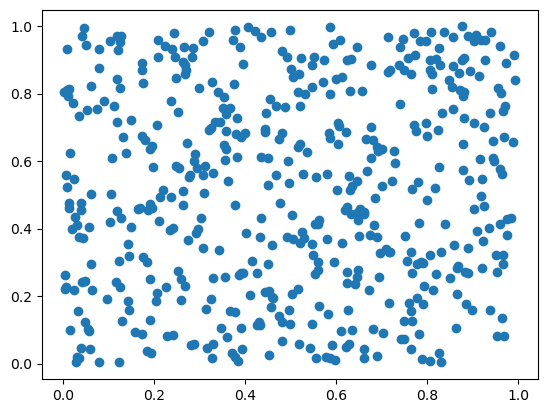

In [94]:
plt.scatter(df.x,df.y)

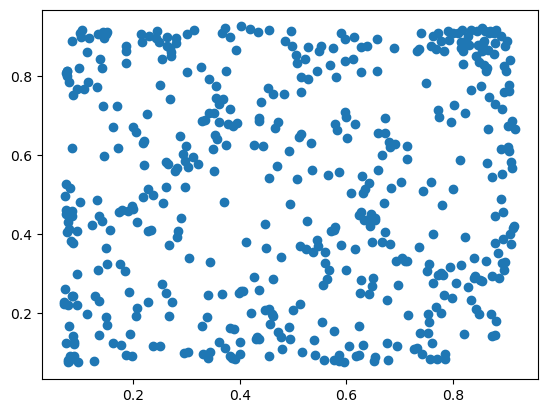

In [114]:
plt.scatter(newps[:,0],newps[:,1])

In [140]:
def meanshiftevolution(P0s,K,sigma,numt):
    t=0
    newPs=P0s
    while t<numt:
        newPs=newPs+Pdot(newPs,Kernel,sigma)
        t+=1
    return newPs

In [142]:
new=meanshiftevolution(Ps,Kernel,sigma,1)

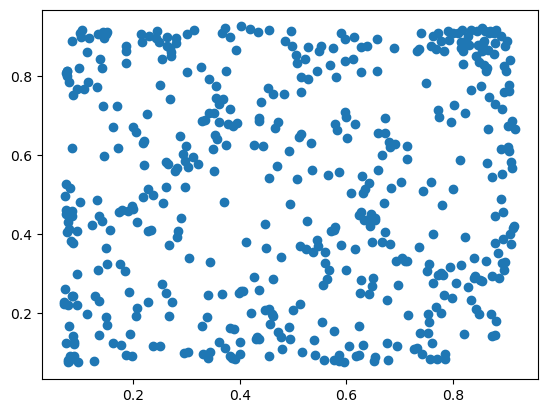

In [144]:
plt.scatter(new[:,0],new[:,1])

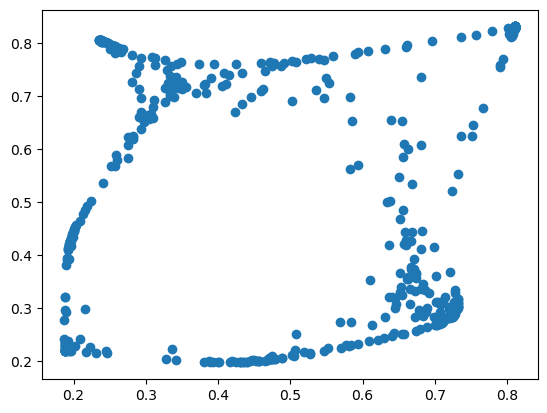

In [166]:
new=meanshiftevolution(Ps,Kernel,0.1,4)
plt.scatter(new[:,0],new[:,1])